# GHCNh library and description

## Global Historical Climatology Network hourly (GHCNh)

### Eagle Rock Analytic's GHCNh library

#### Clone GHCNh library

```bash
git clone https://github.com/Eagle-Rock-Analytics/GHCNh.git
cd GHCNh
branch="origin/ghcnh_class_dev"
git branch --track ${branch##origin/} $branch

#### Import GHCNh class

```python
from GHCNh.GHCNh_lib import GHCNh
ghcnh = GHCNh()```

#### Plot GHCNh stations

```python
wecc_terr = "s3://wecc-historical-wx/0_maps/WECC_Informational_MarineCoastal_Boundary_land.shp"
wecc_mar = "s3://wecc-historical-wx/0_maps/WECC_Informational_MarineCoastal_Boundary_marine.shp"
t = gpd.read_file(wecc_terr).iloc[0].geometry  ## Read in terrestrial WECC shapefile.
m = gpd.read_file(wecc_mar).iloc[0].geometry   ## Read in marine WECC shapefile.

fig,ax = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()})

ax.coastlines()
ax.add_feature(cf.BORDERS)
ax.add_geometries(m, crs=ccrs.PlateCarree(), color="C0", alpha=0.25)
ax.add_geometries(t, crs=ccrs.PlateCarree(), color="C1", alpha=0.25)
# ax.add_feature(cf.STATES, lw=0.5)
ax.set_extent([-130, -100, 28, 52])
ax.plot(ghcnh.stations_df['longitude'], ghcnh.stations_df['latitude'], 
        marker='.', lw=0, c="k", ms=2, label="WECC")
tmp = ghcnh.stations_df[~ghcnh.stations_df['is_in_wecc']]
ax.plot(tmp['longitude'], tmp['latitude'], 
        marker='.', lw=0, c="red", ms=2, label="Not WECC")
ax.legend()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=["bottom", "left"],
                  ls=":", lw=0.5)
ax.set_title("GHCNh stations");
```

#### Select WECC 

``` python
ghcnh.select_wecc()
id = ghcnh.stations_df['id'].iloc[0]
print(id)
ghcnh.read_data_from_url(id=id)
ghcnh.station_data
```

#### Plot some variables from the read station

``` python
fig,ax = plt.subplots()

ghcnh.station_data.plot(ax=ax, x="time", y="temperature")
ghcnh.station_data.plot(ax=ax, x="time", y="dew_point_temperature")
ax.set_title(id);
```

## Test ERA's GHCNh library

In [1]:
# import libraries
import pandas as pd
import numpy as np
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf
from matplotlib.ticker import MaxNLocator
import sys
%load_ext autoreload
%autoreload 2

#### Append local GHCNh library path

In [2]:
ghcnh_lib_path = "/Users/hector/ERA_work/historical-obs-platform/test_platform/scripts/3_qaqc_data/qaqc_eval_notebooks/GHCNh"
sys.path.append(ghcnh_lib_path)

In [3]:
# from GHCNh.GHCNh_lib import GHCNh  # If GHCNh is within current folder
from GHCNh_lib import GHCNh # If GHCNh is was appended to path

#### Create GHCNh class

In [4]:
%%time
ghcnh = GHCNh(stations_local=True)
ghcnh.stations_df.head()

CPU times: user 14.4 ms, sys: 2.43 ms, total: 16.8 ms
Wall time: 16.1 ms


,id,latitude,longitude,elevation,state,name,gsn_flag,hcn,crn_flag,wmo_id,url,is_in_wecc
0,ACL000BARA9,17.5910,-61.8210,5.0,TX,BARBUDA,,,,NaN,https://www.ncei.noaa.gov/oa/global-historical...,False
1,ACW00011647,17.1333,-61.7833,19.2,,ST JOHNS,,,,NaN,https://www.ncei.noaa.gov/oa/global-historical...,False
2,AFW00000472,43.0667,74.4667,637.0,TX,KYRGYZSTAN US MIL BISHKEK,,,,NaN,https://www.ncei.noaa.gov/oa/global-historical...,False
3,AQC00914594,-14.3333,-170.7667,42.4,AS,MALAELOA,,,,NaN,https://www.ncei.noaa.gov/oa/global-historical...,False
4,AQC00914902,-14.2728,-170.6922,80.8,AS,VAIPITO,,,,NaN,https://www.ncei.noaa.gov/oa/global-historical...,False


#### Select WECC stations

In [5]:
ghcnh.select_wecc()
ghcnh.stations_df.head()

,id,latitude,longitude,elevation,state,name,gsn_flag,hcn,crn_flag,wmo_id,url,is_in_wecc
38,CAW00025343,54.2500,-133.0500,41.1,BC,LANGARA,,,,NaN,https://www.ncei.noaa.gov/oa/global-historical...,True
238,USC00020080,32.3698,-112.8599,533.7,AZ,AJO,,,,NaN,https://www.ncei.noaa.gov/oa/global-historical...,True
239,USC00020487,35.1989,-112.4886,1546.9,AZ,ASH FORK 3,,,,NaN,https://www.ncei.noaa.gov/oa/global-historical...,True
240,USC00020808,33.4783,-109.7516,1848.6,AZ,BLACK RIVER PUMPS,,,,NaN,https://www.ncei.noaa.gov/oa/global-historical...,True
241,USC00021574,34.5397,-110.9155,2135.4,AZ,CHEVELON RANGER STATION,,,,NaN,https://www.ncei.noaa.gov/oa/global-historical...,True


#### Show the name/id of the first GHCNh's WECC station

In [6]:
%%time
id = ghcnh.stations_df['id'].iloc[0]
id

CPU times: user 153 µs, sys: 1 µs, total: 154 µs
Wall time: 157 µs


'CAW00025343'

#### Read station data from url (or from local file if exists)
- Save file to disk if save=True

In [7]:
ghcnh.read_data_from_url(id, save=True)

/Users/hector/ERA_work/historical-obs-platform/test_platform/scripts/3_qaqc_data/qaqc_eval_notebooks/GHCNh/GHCNh_lib.py:150: DtypeWarning: Columns (12,18,24,30,42,49,51,60,66,76,77,79,81,82,83,85,87,106,107,109,111,125,127,129,139,141,143,145,147,148,149,151,153,157,159,160,161,163,165,169,171,172,173,175,177,181,183,191,193,195,227,229,231,232,234,237) have mixed types. Specify dtype option on import or set low_memory=False.
  self.station_data = pd.read_csv(self.local_filename, sep='|')


In [8]:
ghcnh.station_data.head(3)

,Station_ID,Station_name,Year,Month,Day,Hour,Minute,Latitude,Longitude,Elevation,...,precipitation_24_hour_Report_Type,precipitation_24_hour_Source_Code,precipitation_24_hour_Source_Station_ID,remarks,remarks_Measurement_Code,remarks_Quality_Code,remarks_Report_Type,remarks_Source_Code,remarks_Source_Station_ID,time
0,CAW00025343,LANGARA,1954,1,1,9,0,54.25,-133.05,41.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1954-01-01 09:00:00
1,CAW00025343,LANGARA,1954,1,1,21,0,54.25,-133.05,41.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1954-01-01 21:00:00
2,CAW00025343,LANGARA,1954,1,2,3,0,54.25,-133.05,41.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1954-01-02 03:00:00


#### Extract mean lon,lat of the station for plotting

In [9]:
lon = ghcnh.station_data.Longitude.mean()
lat = ghcnh.station_data.Latitude.mean()
print("{}, {:.5f}, {:.5f}".format(id, lon, lat))

CAW00025343, -133.05000, 54.25000


#### Plot station example variables

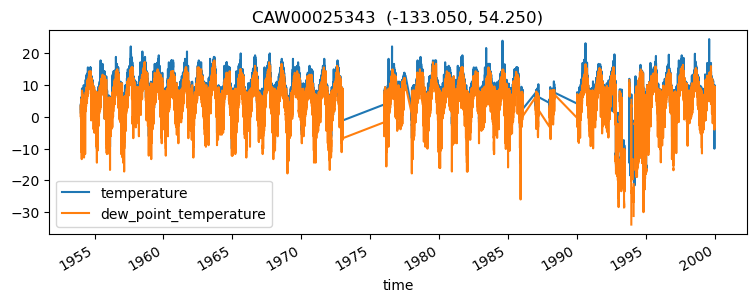

In [10]:
fig,ax = plt.subplots(figsize=(9,3))

ghcnh.station_data.plot(ax=ax, x="time", y="temperature")
ghcnh.station_data.plot(ax=ax, x="time", y="dew_point_temperature")
ax.set_title("{}  ({:.3f}, {:.3f})".format(id,lon,lat));

#### Convert station dataframe to geopandas

In [11]:
ghcnh.convert_df_to_gpd()
ghcnh.stations_df.head(3)

,id,latitude,longitude,elevation,state,name,gsn_flag,hcn,crn_flag,wmo_id,url,is_in_wecc,geometry
38,CAW00025343,54.2500,-133.0500,41.1,BC,LANGARA,,,,NaN,https://www.ncei.noaa.gov/oa/global-historical...,True,POINT (-14811058.250 7217646.198)
238,USC00020080,32.3698,-112.8599,533.7,AZ,AJO,,,,NaN,https://www.ncei.noaa.gov/oa/global-historical...,True,POINT (-12563506.599 3811951.112)
239,USC00020487,35.1989,-112.4886,1546.9,AZ,ASH FORK 3,,,,NaN,https://www.ncei.noaa.gov/oa/global-historical...,True,POINT (-12522173.672 4190943.819)


## Description of GHCNh dataset and psv files

### General information

Each station “psv” file is made up of a unique identifier and time step followed by
- **30 variable fields**:
    * Each with 5 associated metadata/attribute fields
- All fields are “pipe” separated (pipe = “|”).
- Each of the variables and metadata fields are described with explicit names in a header line at the beginning of each station file.
    * Note that the header length is quite long and is also pipe delimited.
 


**Each station record is indexed to:** 
- a single GHCN Station_ID
- Station_name
- Latitude
- Longitude
- Elevation

which was extracted from metadata provided by one or more data sources.

**Each observation is also indexed to:**

- a single Year, Month, Day, Hour and Minute in Coordinated Universal Time (UTC).

Following the identifier, coordinates and time stamp for the observation, there are **38 sets of observations for 38 variables** and their accompanying metadata/attributes as follows:

- **variable** (see section IV, Table 1)
- **variable_Measurement_Code** (see section V, Table 2)
- **variable_Quality_Code** (see section VI, Table 3)
- **variable_Report_Type** (see section VII, Table 4)
- **variable_Source_Code** (see section VII, Table 5)
- **variable_Source_Station_ID** (original identifier provided in the data source)

Where variable refers to the list of variables in Table 1 and their units. 

A list of potential Measurement_Codes by variable type is provided in Table2. 

The list of Quality_Codes is provided in Table 3. 

Table 4 provides the list of possible report types. 

All column numbers and names are provided in Appendix Table A1.


### Primary data variables

#### <u>Table 1: Elements/Variables</u>

<div style="display: inline-block">
    
| Variable   |      Description      |  Units |
|---|---|---|
| temperature | <div style="width: 40em;">  2 meter (circa) Above Ground Level Air (dry bulb) Temperature </div>| 0C to tenths |
| dew_point_temperature | <div style="width: 40em;">  Dew Point Temperature </div>| 0C to tenths |
| station_level_pressure | <div style="width: 40em;"> The pressure that is observed at a specific elevation and is the true barometric pressure of a location. It is the pressure exerted by the atmosphere at a point as a result of gravity acting upon the "column" of air that lies directly above the point </div> | hPa |
| wind_direction | <div style="width:  40em;"> Wind Direction from true north using compass directions (e.g. 360 = true north, 180 = south, 270 = west, etc.). Note: A direction of “000” is given for calm winds </div>| whole degrees |
| wind_speed | <div style="width:  40em;"> Wind Speed </div> | meters per second |
| wind_gust | <div style="width:  40em;"> Peak short duration (usually < 20 seconds) wind speed (meters per second) that exceeds the wind_speed average </div> |  |
| precipitation | <div style="width:  40em;"> total liquid precipitation (rain or melted snow) for past hour; a “T” in the measurement code column indicates a trace amount of precipitation </div> | millimeters |
| relative_humidity | <div style="width:  40em;"> Relative humidity is calculated from air (dry bulb) temperature and dew point temperature </div> | whole percent |
| wet_bulb_temperature | <div style="width:  40em;"> Present weather observation; MW1 - MW3 is sourced from manual reports; up to 3 observations per report </div> | 0C to tenths |
| pres_wx_MW1 | <div style="width:  40em;"> Present weather observation; MW1 - MW3 is sourced from manual reports; up to 3 observations per report </div> | code |
| pres_wx_MW2 | <div style="width:  40em;"> see above </div> | code |
| pres_wx_MW3 | <div style="width:  40em;"> see above </div> | code |
| pres_wx_AU1 | <div style="width:  40em;"> weather observation; AU1 - AU3 is sourced from automated ASOS/AWOS sensors; up to 3 observations per report </div> | code |
| pres_wx_AU2 | <div style="width:  40em;"> see above </div> | code |
| pres_wx_AU3 | <div style="width:  40em;"> see above </div> | code |
| pres_wx_AW1 | <div style="width:  40em;"> Present weather observation; AW1 - AW3 is sourced from automated sensors; up to 3 observations per report </div> | code |
| pres_wx_AW2 | <div style="width:  40em;"> see above </div> | code |
| pres_wx_AW3 | <div style="width:  40em;"> see above </div> | code |
| snow_depth | <div style="width:  40em;"> depth of snowpack on the ground </div> | centimeters/m |
| visibility | <div style="width:  40em;"> horizontal distance at which an object can be seen and identified </div> | kilometers |
| altimeter | <div style="width:  40em;"> the pressure "reduced" to mean sea level using the temperature profile of the "standard" atmosphere, which is representative of average conditions over the United States at 40 degrees north latitude </div> | millibars/hPa |
| pressure_3hr_change | <div style="width:  40em;"> change in atmospheric pressure measured at the beginning and end of a three hour period; accompanied by tendency code in measurement code field </div> | millibars/hPa |
| sky_cover_1 | <div style="width:  40em;"> Fraction of total celestial dome with sky coverage; defines a layer in oktas (i.e. eights) or tenths of sky covered by cloud; up to 3 observations </div> | code |
| sky_cover_2 | <div style="width:  40em;"> see above </div> | code |
| sky_cover_3 | <div style="width:  40em;"> see above </div> | (see Table X for code definitions) |
| sky_cover_baseht_1 | <div style="width:  40em;"> Discrete cloud base heights at lowest point of layer; up to 3 vertical layers can be reported; clear skies reported as a single layer </div> | meters |
| sky_cover_baseht_2 | <div style="width:  40em;"> see above </div> |  |
| sky_cover_baseht_3 | <div style="width:  40em;"> see above </div> |  |
| precipitation_3_hour | <div style="width:  40em;"> 3-hour total liquid precipitation (rain or melted snow) accumulation from FM12/SYNOP reports; a “T” in the measurement code column   indicates a trace amount of precipitation. Accumulations can be reported over 3, 6, 9, 12, 15, 18, 21 and 24 hours. </div> | millimeters |
| precipitation_6_hour | <div style="width:  40em;"> see above </div> |  |
| precipitation_9_hour | <div style="width:  40em;"> see above </div> |  |
| precipitation_12_hour | <div style="width:  40em;"> see above </div> |  |
| precipitation_15_hour | <div style="width:  40em;"> see above </div> |  |
| precipitation_18_hour | <div style="width:  40em;"> see above </div> |  |
| precipitation_21_hour | <div style="width:  40em;"> see above </div> |  |
| precipitation_24_hour | <div style="width:  40em;"> see above </div> |  |
| remarks | <div style="width:  40em;"> Hourly Remarks present the raw surface observation data in the original format  encoded into ICAO-standardized METAR (FM15) or FM12 (SYNOP), FM16 (SPECI) etc format for global dissemination. Further information on decoding these observations can be found in the Federal Meteorological Handbook (FMH) No. 1, Surface Weather Observations & Reports. </div> |  |

</div>

### VI. List of Quality Check codes

#### <u> Table 3: QC (code varies by source) </u>

<div style="width: 60em;">
A general set of quality control checks is applied to a subset of variables after all sources are integrated into a set of unique period of record station files. These checks are described in Dunn et al. (2016). In addition, GHCNh preserves the Quality Control information of its component sources. The set of general flags that apply to the integrated set of sources and the variables temperature, dew_point_temperature, station_level_pressure, sea_level_pressure, wind_direction, and wind_speed
</div>

**The list of codes include:**
<div style="display: inline-block">
    
|    |    |
|---|---|
|  
| "L" : "0," | # failed Logical consistency |
| "o" : "1," | # outlier check |
| "F" : "2," | # Frequent value check |
| "U" : "3," | # diUrnal inconsistency check |
| "D" : "4," | # Distribution 1 |
| "d" : "5," | # distribution 2 |
| "W" : "6," | # World records exceedance |
| "K" : "7," | # StreaK check |
| "C" : "8," | # Climatological outlier |
| "T" : "9," | # Timestamp issue |
| "S" : "10," | # Spike check |
| "h" : "11," | # humidity |
| "V" : "12," | # Variance |
| "w" : "13," | # winds |
| "N" : "14," | # Neighbor comparison outlier |
| "E" : "15," | # clEan up |
| "p" : "16," | # pressure |
| "H" : "17," | # High flag rate |

</div>

#### The Legacy Codes for Sources 313, 314, 315, 322, 335, 343, 344, 345, 346 include 0 = Passed gross limits check
<div style="display: inline-block">
    
|    |    |
|---|---|
|  
| 1 |  Passed all quality control checks |
| 2 | Suspect |
| 3 | Erroneous |
| 4 | Passed gross limits check, data originate from an NCEI data source |
| 5 | Passed all quality control checks, data originate from an NCEI data source |
| 6 | Suspect, data originate from an NCEI data source |
| 7 | Erroneous, data originate from an NCEI data source |
| 9 | Passed gross limits check if element is present |
| A | Data value flagged as suspect, but accepted as good value. |
| U | Data value replaced with edited value. |
| P | Data value not originally flagged as suspect, but replaced by validator. |
| I | Data value not originally in data, but inserted by validator. |
| M | Manual change made to value based on information provided by NWS or FAA. |
| C | <div style="width:  60em;"> Temperature and dew point received from Automated Weather Observing Systems (AWOS) are reported in whole degrees Celsius. Automated QC flags these values, but they are accepted as valid. </div>|
| R | Data value replaced with value computed by NCEI software. |

</div>

#### And Legacy Codes for Sources: 220, 221, 222, 223, 347, 348 include 0 Not Checked 
<div style="display: inline-block">
    
|    |    |
|---|---|
| 1 | Good |
| 2 | Suspect |
| 3 | Erroneous |
| 4 | Calculated |
| 5 | Removed |

</div>

#### Derived variables (relative humidity and wet-bulb temperature) can have the following QC flags: 
<div style="display: inline-block">
    
|    |    |
|---|---|
| o | Out of range (relative humidity only - with values < 1 or > 100) |
| f | Suspect or Error flags for 1 or more of the input measurements |

</div>

### Variables/columns of each GHCNh psv file / dataframe

### Table A1: Columns/Headers

<div style="display: inline-block">
<div style="display: flex; justify-content: space-between;">
<div style="width: 45%;">
  
| Col# | Header |
|---|---|
| 1 | Station_ID |
| 2 | Station_name |
| 3 | Year |
| 4 | Month |
| 5 | Day |
| 6 | Hour |
| 7 | Minute |
| 8 | Latitude |
| 9 | Longitude |
| 10 | Elevation |
</div>
<div style="width: 45%;">

| Col# | Header |
|---|---|
| 11 | temperature |
| 12 | temperature_Measurement_Code |
| 13 | temperature_Quality_Code |
| 14 | temperature_Report_Type |
| 15 | temperature_Source_Code |
| 16 | temperature_Source_Station_ID |
| 17 | dew_point_temperature |
| 18 | dew_point_temperature_Measurement_Code |
| 19 | dew_point_temperature_Quality_Code |
| 20 | dew_point_temperature_Report_Type |
| 21 | dew_point_temperature_Source_Code |
| 22 | dew_point_temperature_Source_Station_ID |
</div>
<div style="width: 45%;">

| Col# | Header |
|---|---|
| 23 | station_level_pressure |
| 24 | station_level_pressure_Measurement_Code |
| 25 | station_level_pressure_Quality_Code |
| 26 | station_level_pressure_Report_Type |
| 27 | station_level_pressure_Source_Code |
| 28 | station_level_pressure_Source_Station_ID |
| 29 | sea_level_pressure |
| 30 | sea_level_pressure_Measurement_Code |
| 31 | sea_level_pressure_Quality_Code |
| 32 | sea_level_pressure_Report_Type |
| 33 | sea_level_pressure_Source_Code |
| 34 | sea_level_pressure_Source_Station_ID |
</div>
</div>
</div>

<div style="display: inline-block">
<div style="display: flex; justify-content: space-between;">
<div style="width: 45%;">
  
| Col# | Header |
|---|---|
| 35 | wind_direction |
| 36 | wind_direction_Measurement_Code |
| 37 | wind_direction_Quality_Code |
| 38 | wind_direction_Report_Type |
| 39 | wind_direction_Source_Code |
| 40 | wind_direction_Source_Station_ID |
| 41 | wind_speed |
| 42 | wind_speed_Measurement_Code |
| 43 | wind_speed_Quality_Code |
| 44 | wind_speed_Report_Type |
| 45 | wind_speed_Source_Code |
| 46 | wind_speed_Source_Station_ID |
| 47 | wind_gust |
| 48 | wind_gust_Measurement_Code |
| 49 | wind_gust_Quality_Code |
| 50 | wind_gust_Report_Type |
| 51 | wind_gust_Source_Code |
| 52 | wind_gust_Source_Station_ID |
</div>
<div style="width: 45%;">

| Col# | Header |
|---|---|
| 53 | precipitation |
| 54 | precipitation_Measurement_Code |
| 55 | precipitation_Quality_Code |
| 56 | precipitation_Report_Type |
| 57 | precipitation_Source_Code |
| 58 | precipitation_Source_Station_ID |
| 59 | relative_humidity |
| 60 | relative_humidity_Measurement_Code |
| 61 | relative_humidity_Quality_Code |
| 62 | relative_humidity_Report_Type |
| 63 | relative_humidity_Source_Code |
| 64 | relative_humidity_Source_Station_ID |
| 65 | wet_bulb_temperature |
| 66 | wet_bulb_temperature_Measurement_Code |
| 67 | wet_bulb_temperature_Quality_Code |
| 68 | wet_bulb_temperature_Report_Type |
| 69 | wet_bulb_temperature_Source_Code |
| 70 | wet_bulb_temperature_Source_Station_ID |
</div>
<div style="width: 45%;">

| Col# | Header |
|---|---|
| 71 | pres_wx_MW1 |
| 72 | pres_wx_MW1_Measurement_Code |
| 73 | pres_wx_MW1_Quality_Code |
| 74 | pres_wx_MW1_Report_Type |
| 75 | pres_wx_MW1_Source_Code |
| 76 | pres_wx_MW1_Source_Station_ID |
| 77 | pres_wx_MW2 |
| 78 | pres_wx_MW2_Measurement_Code |
| 79 | pres_wx_MW2_Quality_Code |
| 80 | pres_wx_MW2_Report_Type |
| 81 | pres_wx_MW2_Source_Code |
| 82 | pres_wx_MW2_Source_Station_ID |
| 83 | pres_wx_MW3 |
| 84 | pres_wx_MW3_Measurement_Code |
| 85 | pres_wx_MW3_Quality_Code |
| 86 | pres_wx_MW3_Report_Type |
| 87 | pres_wx_MW3_Source_Code |
| 88 | pres_wx_MW3_Source_Station_ID |
</div>
</div>
</div>

<div style="display: inline-block">
<div style="display: flex; justify-content: space-between;">
<div style="width: 45%;">
  
| Col# | Header |
|---|---|
| 89 | pres_wx_AU1 |
| 90 | pres_wx_AU1_Measurement_Code |
| 91 | pres_wx_AU1_Quality_Code |
| 92 | pres_wx_AU1_Report_Type |
| 93 | pres_wx_AU1_Source_Code |
| 94 | pres_wx_AU1_Source_Station_ID |
| 95 | pres_wx_AU2 |
| 96 | pres_wx_AU2_Measurement_Code |
| 97 | pres_wx_AU2_Quality_Code |
| 98 | pres_wx_AU2_Report_Type |
| 99 | pres_wx_AU2_Source_Code |
| 100 | pres_wx_AU2_Source_Station_ID |
| 101 | pres_wx_AU3 |
| 102 | pres_wx_AU3_Measurement_Code |
| 103 | pres_wx_AU3_Quality_Code |
| 104 | pres_wx_AU3_Report_Type |
| 105 | pres_wx_AU3_Source_Code |
| 106 | pres_wx_AU3_Source_Station_ID |
</div>
<div style="width: 45%;">
    
| Col# | Header |
|---|---|
| 107 | pres_wx_AW1 |
| 108 | pres_wx_AW1_Measurement_Code |
| 109 | pres_wx_AW1_Quality_Code |
| 110 | pres_wx_AW1_Report_Type |
| 111 | pres_wx_AW1_Source_Code |
| 112 | pres_wx_AW1_Source_Station_ID |
| 113 | pres_wx_AW2 |
| 114 | pres_wx_AW2_Measurement_Code |
| 115 | pres_wx_AW2_Quality_Code |
| 116 | pres_wx_AW2_Report_Type |
| 117 | pres_wx_AW2_Source_Code |
| 118 | pres_wx_AW2_Source_Station_ID |
| 119 | pres_wx_AW3 |
| 120 | pres_wx_AW3_Measurement_Code |
| 121 | pres_wx_AW3_Quality_Code |
| 122 | pres_wx_AW3_Report_Type |
| 123 | pres_wx_AW3_Source_Code |
| 124 | pres_wx_AW3_Source_Station_ID |
</div>
<div style="width: 45%;">

| Col# | Header |
|---|---|
| 125 | snow_depth |
| 126 | snow_depth_Measurement_Code |
| 127 | snow_depth_Quality_Code |
| 128 | snow_depth_Report_Type |
| 129 | snow_depth_Source_Code |
| 130 | snow_depth_Source_Station_ID |
| 131 | visibility |
| 132 | visibility_Measurement_Code |
| 133 | visibility_Quality_Code |
| 134 | visibility_Report_Type |
| 135 | visibility_Source_Code |
| 136 | visibility_Source_Station_ID |
| 137 | altimeter |
| 138 | altimeter_Measurement_Code |
| 139 | altimeter_Quality_Code |
| 140 | altimeter_Report_Type |
| 141 | altimeter_Source_Code |
| 142 | altimeter_Source_Station_ID |
</div>
</div>
</div>

<div style="display: inline-block">
<div style="display: flex; justify-content: space-between;">
<div style="width: 45%;">

| Col# | Header |
|---|---|
| 143 | pressure_3hr_change |
| 144 | pressure_3hr_change_Measurement_Code |
| 145 | pressure_3hr_change_Quality_Code |
| 146 | pressure_3hr_change_Report_Type |
| 147 | pressure_3hr_change_Source_Code |
| 148 | pressure_3hr_change_Source_Station_ID |
| 149 | sky_cover_1 |
| 150 | sky_cover_1_Measurement_Code |
| 151 | sky_cover_1_Quality_Code |
| 152 | sky_cover_1_Report_Type |
| 153 | sky_cover_1_Source_Code |
| 154 | sky_cover_1_Source_Station_ID |
| 155 | sky_cover_baseht_1 |
| 156 | sky_cover_baseht_1_Measurement_Code |
| 157 | sky_cover_baseht_1_Quality_Code |
| 158 | sky_cover_baseht_1_Report_Type |
| 159 | sky_cover_baseht_1_Source_Code |
| 160 | sky_cover_baseht_1_Source_Station_ID |
</div>
<div style="width: 45%;">
    
| Col# | Header |
|---|---|
| 161 | sky_cover_2 |
| 162 | sky_cover_2_Measurement_Code |
| 163 | sky_cover_2_Quality_Code |
| 164 | sky_cover_2_Report_Type |
| 165 | sky_cover_2_Source_Code |
| 166 | sky_cover_2_Source_Station_ID |
| 167 | sky_cover_baseht_2 |
| 168 | sky_cover_baseht_2_Measurement_Code |
| 169 | sky_cover_baseht_2_Quality_Code |
| 170 | sky_cover_baseht_2_Report_Type |
| 171 | sky_cover_baseht_2_Source_Code |
| 172 | sky_cover_baseht_2_Source_Station_ID |
| 173 | sky_cover_3 |
| 174 | sky_cover_3_Measurement_Code |
| 175 | sky_cover_3_Quality_Code |
| 176 | sky_cover_3_Report_Type |
| 177 | sky_cover_3_Source_Code |
| 178 | sky_cover_3_Source_Station_ID |
</div>
<div style="width: 45%;">
    
| Col# | Header |
|---|---|
| 179 | sky_cover_baseht_3 |
| 180 | sky_cover_baseht_3_Measurement_Code |
| 181 | sky_cover_baseht_3_Quality_Code |
| 182 | sky_cover_baseht_3_Report_Type |
| 183 | sky_cover_baseht_3_Source_Code |
| 184 | sky_cover_baseht_3_Source_Station_ID |
| 185 | precipitation_3_hour |
| 186 | precipitation_3_hour_Measurement_Code |
| 187 | precipitation_3_hour_Quality_Code |
| 188 | precipitation_3_hour_Report_Type |
| 189 | precipitation_3_hour_Source_Code |
| 190 | precipitation_3_hour_Source_Station_ID |
| 191 | precipitation_6_hour |
| 192 | precipitation_6_hour_Measurement_Code |
| 193 | precipitation_6_hour_Quality_Code |
| 194 | precipitation_6_hour_Report_Type |
| 195 | precipitation_6_hour_Source_Code |
| 196 | precipitation_6_hour_Source_Station_ID |
</div>
</div>
</div>

<div style="display: inline-block">
<div style="display: flex; justify-content: space-between;">
<div style="width: 45%;">

| Col# | Header |
|---|---|
| 197 | precipitation_9_hour |
| 198 | precipitation_9_hour_Measurement_Code |
| 199 | precipitation_9_hour_Quality_Code |
| 200 | precipitation_9_hour_Report_Type |
| 201 | precipitation_9_hour_Source_Code |
| 202 | precipitation_9_hour_Source_Station_ID |
| 203 | precipitation_12_hour |
| 204 | precipitation_12_hour_Measurement_Code |
| 205 | precipitation_12_hour_Quality_Code |
| 206 | precipitation_12_hour_Report_Type |
| 207 | precipitation_12_hour_Source_Code |
| 208 | precipitation_12_hour_Source_Station_ID |
| 209 | precipitation_15_hour |
| 210 | precipitation_15_hour_Measurement_Code |
| 211 | precipitation_15_hour_Quality_Code |
| 212 | precipitation_15_hour_Report_Type |
| 213 | precipitation_15_hour_Source_Code |
| 214 | precipitation_15_hour_Source_Station_ID |
</div>
<div style="width: 45%;">
    
| Col# | Header |
|---|---|
| 215 | precipitation_18_hour |
| 216 | precipitation_18_hour_Measurement_Code |
| 217 | precipitation_18_hour_Quality_Code |
| 218 | precipitation_18_hour_Report_Type |
| 219 | precipitation_18_hour_Source_Code |
| 220 | precipitation_18_hour_Source_Station_ID |
| 221 | precipitation_21_hour |
| 222 | precipitation_21_hour_Measurement_Code |
| 223 | precipitation_21_hour_Quality_Code |
| 224 | precipitation_21_hour_Report_Type |
| 225 | precipitation_21_hour_Source_Code |
| 226 | precipitation_21_hour_Source_Station_ID |
| 227 | precipitation_24_hour |
| 228 | precipitation_24_hour_Measurement_Code |
| 229 | precipitation_24_hour_Quality_Code |
| 230 | precipitation_24_hour_Report_Type |
| 231 | precipitation_24_hour_Source_Code |
| 232 | precipitation_24_hour_Source_Station_ID |
</div>
<div style="width: 45%;">
    
| Col# | Header |
|---|---|
| 233 | remarks |
| 234 | remarks_Measurement_Code |
| 235 | remarks_Quality_Code |
| 236 | remarks_Report_Type |
| 237 | remarks_Source_Code |
| 238 | remarks_Source_Station_ID |
</div>
</div>
</div>